In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "LoanGrantingCleanedDatasetV6scaled.csv"
raw_data = pd.read_csv(datafile, header=0)

In [3]:
df = pd.DataFrame(raw_data)
df.corr()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,...,LOG_Annual Income,LOG_Monthly Debt,LOG_Years of Credit History,LOG_Months since last delinquent,LOG_Number of Open Accounts,LOG_Number of Credit Problems,LOG_Current Credit Balance,LOG_Maximum Open Credit,LOG_Bankruptcies,LOG_Tax Liens
Loan Status,1.000000,-0.100308,-0.193739,0.263947,0.015284,0.041230,0.084603,0.041772,-0.055271,0.026376,...,0.081352,-0.054234,0.033678,0.002344,-0.026692,-0.008221,-0.027557,0.034876,0.002022,-0.008038
Current Loan Amount,-0.100308,1.000000,0.445143,-0.236654,0.146285,0.100388,0.449178,-0.000018,0.396514,0.120829,...,0.452328,0.354770,0.143288,-0.015662,0.201827,-0.025292,0.327973,0.293915,-0.028579,0.003166
Term,-0.193739,0.445143,1.000000,-0.482620,0.082432,0.064633,0.147822,-0.008983,0.180589,0.039770,...,0.160183,0.160997,0.052364,-0.001909,0.088049,-0.008893,0.117346,0.095367,-0.004551,-0.000400
Credit Score,0.263947,-0.236654,-0.482620,1.000000,-0.019575,0.035985,0.004738,0.072627,-0.120825,0.086392,...,0.002289,-0.100840,0.095265,-0.076604,-0.019041,-0.029706,-0.030190,0.089128,-0.023036,-0.011117
Years in current job,0.015284,0.146285,0.082432,-0.019575,1.000000,0.131090,0.209303,0.031194,0.173800,0.142453,...,0.230693,0.169401,0.182421,0.051088,0.079147,0.002471,0.116899,0.100433,-0.003784,0.007600
Home Ownership,0.041230,0.100388,0.064633,0.035985,0.131090,1.000000,0.122153,0.014550,0.097121,0.166528,...,0.120407,0.079532,0.179206,0.034272,0.093827,0.008341,0.081361,0.112072,0.000430,0.009048
Annual Income,0.084603,0.449178,0.147822,0.004738,0.209303,0.122153,1.000000,-0.010772,0.539838,0.168485,...,0.969621,0.459093,0.203047,0.083223,0.227931,0.009696,0.239874,0.234532,-0.005238,0.019269
Purpose,0.041772,-0.000018,-0.008983,0.072627,0.031194,0.014550,-0.010772,1.000000,0.042208,0.004470,...,-0.007553,0.059070,0.004568,-0.000137,0.051526,-0.003637,0.067752,0.042567,-0.002075,0.001425
Monthly Debt,-0.055271,0.396514,0.180589,-0.120825,0.173800,0.097121,0.539838,0.042208,1.000000,0.138599,...,0.537688,0.872604,0.165286,0.041728,0.442404,-0.013225,0.387910,0.291892,-0.020204,0.010580
Years of Credit History,0.026376,0.120829,0.039770,0.086392,0.142453,0.166528,0.168485,0.004470,0.138599,1.000000,...,0.167421,0.118563,0.963649,0.131335,0.111814,0.024070,0.149611,0.175370,0.012026,0.007378


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11564cd10>]], dtype=object)

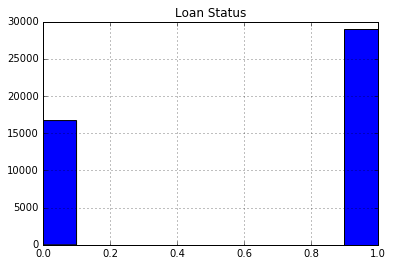

In [4]:
df.hist("Loan Status")

In [5]:
y_data = df["Loan Status"]
ft_cols = df.columns.tolist() # feature columns to plot
ft_cols.remove("Loan Status")
ft_cols.remove("Loan ID")
ft_cols.remove("Customer ID")
#ft_cols = ["Current Loan Amount", "Credit Score", "Term", "Annual Income", "Home Ownership", "Monthly Debt"]
X_data = df[ft_cols]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=123)

In [7]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
logreg.score(X_test, y_test)

0.64669585987261147

In [9]:
from sklearn import preprocessing
X_data = preprocessing.scale(X_data)
    
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=123)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
logreg.score(X_test, y_test)

0.67411056376573619